https://www.datacamp.com/datalab/w/4d024a9e-fb19-41e6-a85c-4cfe7c6480fc/edit

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as penguins.csv

Origin of this data : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

The dataset consists of 5 columns.

Column	Description
culmen_length_mm	culmen length (mm)
culmen_depth_mm	culmen depth (mm)
flipper_length_mm	flipper length (mm)
body_mass_g	body mass (g)
sex	penguin sex
Unfortunately, they have not been able to record the species of penguin, but they know that there are at least three species that are native to the region: Adelie, Chinstrap, and Gentoo. Your task is to apply your data science skills to help them identify groups in the dataset!

In [9]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
penguins_df = pd.get_dummies(penguins_df, dtype='int') 
# dtype='int' ensure the output will be 0/1 instead of True/False

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,-0.884499,0.785449,-1.418347,-0.564142,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,1.023533
1,-0.811126,0.126188,-1.062250,-0.501703,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,1.041561,-0.977008
2,-0.664380,0.430462,-0.421277,-1.188532,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,1.041561,-0.977008
3,NaN,NaN,NaN,NaN,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,-0.977008
4,-1.324737,1.089724,-0.563715,-0.938776,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,1.041561,-0.977008
5,-0.847812,1.748985,-0.777373,-0.689020,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,1.023533
6,-0.921185,0.329038,-1.418347,-0.720240,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,1.041561,-0.977008
7,-0.866155,1.241861,-0.421277,0.590980,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,1.023533
8,-1.801661,0.481175,-0.563715,-0.907557,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,-0.977008
9,-0.352544,1.546135,-0.777373,0.060248,1.123903,-0.496364,-0.750757,-0.977008,-0.750757,2.36968,-0.960098,-0.977008


In [13]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

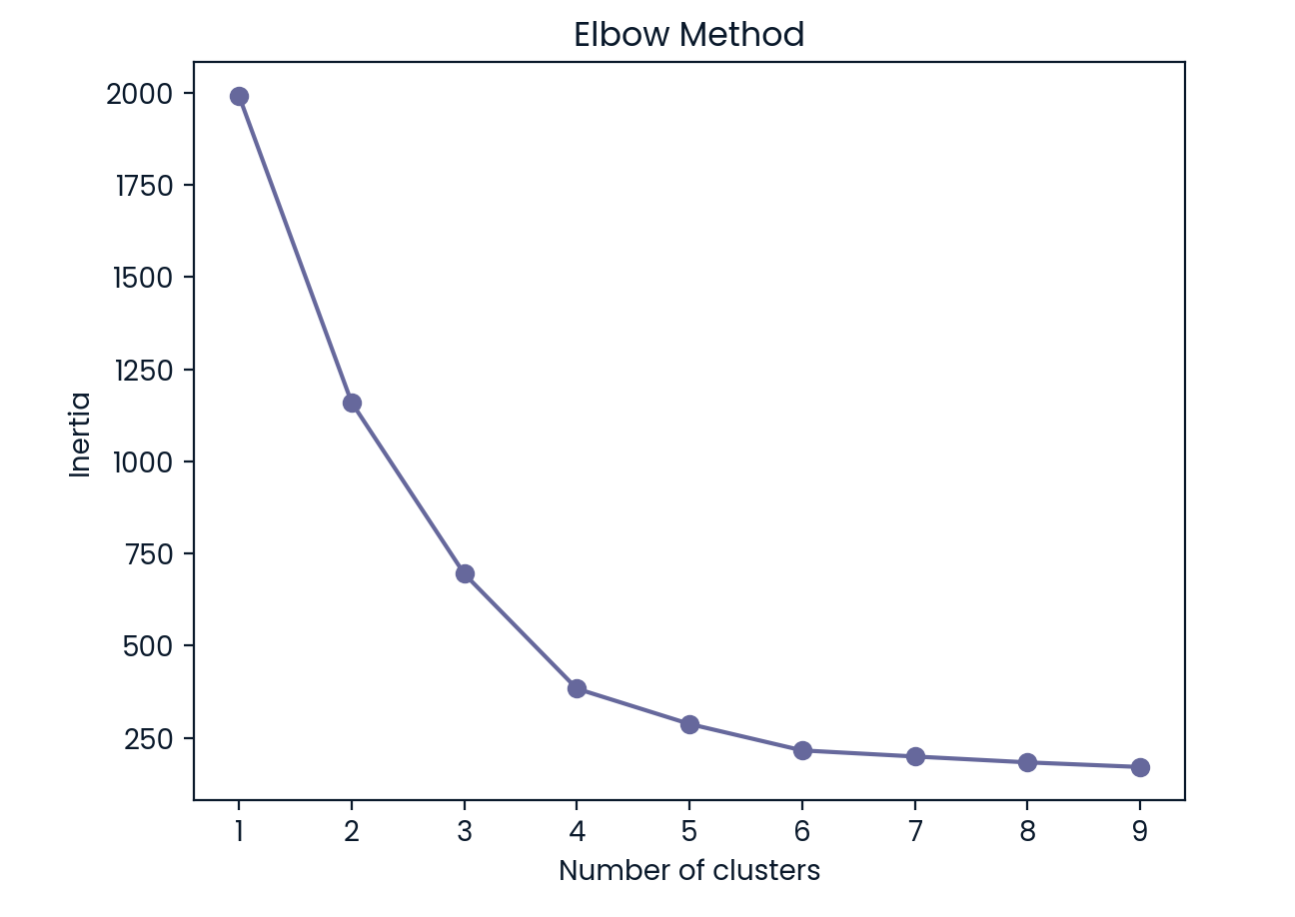

In [14]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

NameError: name 'n_clusters' is not defined

In [15]:
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


KeyError: 'label'

In [16]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

KeyError: "['culmen_length_mm', 'culmen_depth_mm', 'label'] not in index"